## New York housing market data analysis

In [2]:
import pandas as pd
import seaborn as sb 
import pyodbc  
import numpy as np  
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('C:\\pyhthon\\.ipynb_checkpoints\\data\\NY-House-Dataset.csv')

In [4]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [6]:
df.BROKERTITLE.value_counts()

BROKERTITLE
Brokered by COMPASS                              456
Brokered by Douglas Elliman - 575 Madison Ave    110
Brokered by Brown Harris Stevens                  93
Brokered by Corcoran East Side                    91
Brokered by RE MAX Edge                           79
                                                ... 
Brokered by Gerard R Desgranges                    1
Brokered by Property Professional Realty           1
Brokered by Mark Murphy Properties                 1
Brokered by S Sharf Realty Inc                     1
Brokered by New York Way Real Estate Corp          1
Name: count, Length: 1036, dtype: int64

In [7]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [8]:
# drop the lines where the beds are more then 10
df = df.drop(df[df['BEDS'] > 10].index)
        

In [10]:
df.corr(numeric_only=True)

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
PRICE,1.000000,0.070662,0.097469,0.112544,-0.020698,-0.054069
BEDS,0.070662,1.000000,0.670264,0.327499,-0.069713,-0.002803
BATH,0.097469,0.670264,1.000000,0.391568,-0.049333,-0.086239
PROPERTYSQFT,0.112544,0.327499,0.391568,1.000000,0.033733,-0.033785
LATITUDE,-0.020698,-0.069713,-0.049333,0.033733,1.000000,0.513035
LONGITUDE,-0.054069,-0.002803,-0.086239,-0.033785,0.513035,1.000000


### rename the columns 

In [11]:
df.rename(columns = {'BEDS':'ROOMS'}, inplace=True)

In [12]:
df.describe()

,PRICE,ROOMS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.721000e+03,4721.000000,4721.000000,4721.000000,4721.000000,4721.000000
mean,2.335587e+06,3.145944,2.262690,2117.674724,40.714368,-73.941691
std,3.160578e+07,1.772940,1.483108,2238.492459,0.087792,0.101533
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.950000e+05,2.000000,1.000000,1200.000000,40.638826,-73.987397
50%,8.000000e+05,3.000000,2.000000,2184.207862,40.727014,-73.949610
75%,1.450000e+06,4.000000,3.000000,2184.207862,40.771979,-73.869380
max,2.147484e+09,10.000000,32.000000,65535.000000,40.912729,-73.702450


In [13]:
# creating a new column for the price per square foot

In [14]:
NY_Housing_market=df.assign(PRICE_FOR_SQFT = df.PRICE / df.PROPERTYSQFT)

In [15]:
NY_Housing_market['PRICE_FOR_SQFT'] = np.ceil(NY_Housing_market.PRICE_FOR_SQFT)

In [16]:
NY_Housing_market.head(5)

,BROKERTITLE,TYPE,PRICE,ROOMS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,PRICE_FOR_SQFT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,225.0
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,11115.0
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,130.0
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,156.0
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3881.0


In [17]:
NY_Housing_market.STATE.value_counts()

STATE
Brooklyn, NY 11235            102
Brooklyn, NY 11209             93
Forest Hills, NY 11375         91
Brooklyn, NY 11234             89
Staten Island, NY 10314        86
                             ... 
Queens, NY 11427                1
Queens, NY 11429                1
Long Island City, NY 11109      1
Brooklyn, NY 11694              1
Ozone Park, NY 11416            1
Name: count, Length: 308, dtype: int64

In [18]:
NY_Housing_market.ROOMS.value_counts().sort_values(ascending=False)

ROOMS
3     1456
2      995
1      820
4      570
5      360
6      271
7      105
8       84
9       39
10      21
Name: count, dtype: int64

## Create different visualization with your insights

In [19]:
# The average price for square foot of the houses in the dataset    
NY_Housing_market['PRICE_FOR_SQFT'].mean()

826.951281508155

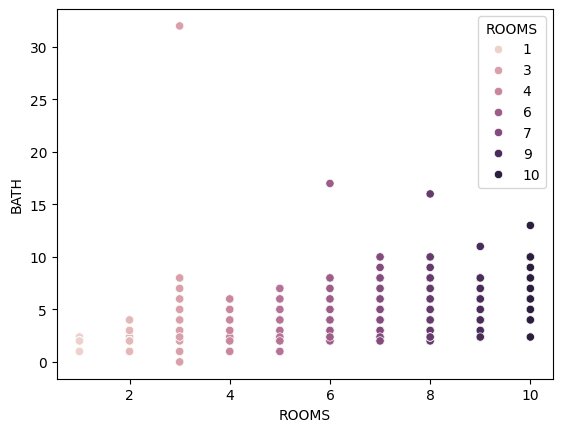

In [21]:
sb.scatterplot(x='ROOMS',y='BATH',data=NY_Housing_market,hue='ROOMS')
plt.show()

In [ ]:
# conclusion: the number of rooms and the number of bathrooms are correlated, the more rooms the more bathrooms.

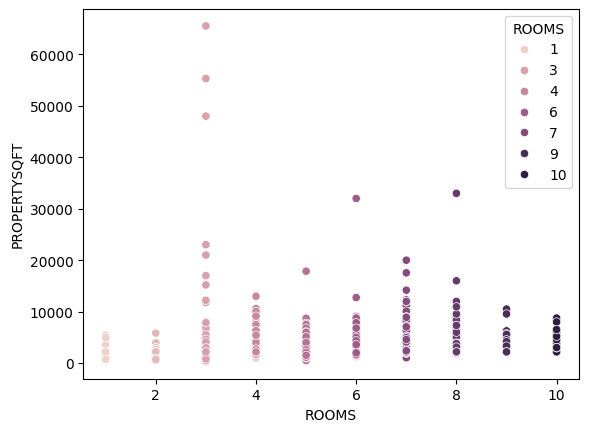

In [22]:
sb.scatterplot(x='ROOMS',y='PROPERTYSQFT',data=NY_Housing_market,hue='ROOMS')
plt.show()

In [ ]:
# conclusion: the price per square foot is higher for the houses with more rooms.

In [24]:
count=NY_Housing_market.groupby('BROKERTITLE')['TYPE'].count().sort_values(ascending=False)

In [25]:
mask=count.head(10)

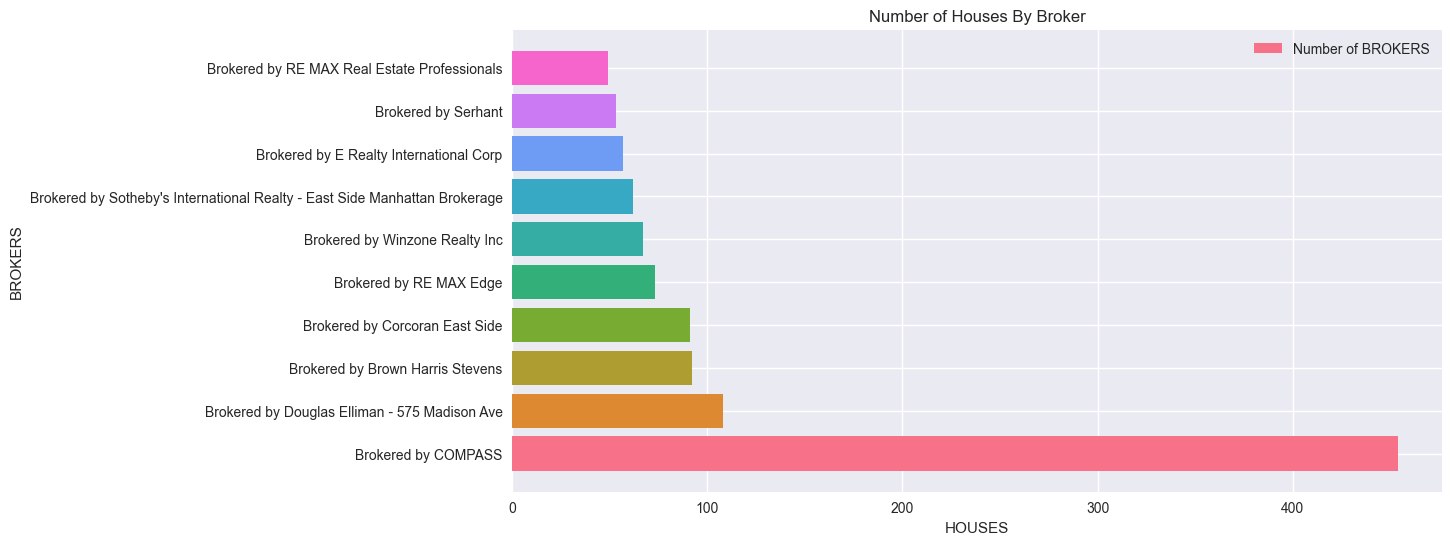

In [26]:
husl=sb.color_palette("husl", 10)

plt.figure(figsize=(12,6))
plt.style.use('seaborn-v0_8')
plt.barh(mask.index,mask,color=husl,label="Number of BROKERS")
plt.title("Number of Houses By Broker")
plt.ylabel("BROKERS")
plt.xlabel("HOUSES")
plt.legend()
plt.show()

In [27]:
#Conclusions :
# Brokered by Compass broker has the highest number of houses in the dataset

In [28]:
Top5_BROKERTITLE= NY_Housing_market[['BROKERTITLE','PRICE']].sort_values(by='PRICE',ascending=False).head(5)

In [29]:
Top5_BROKERTITLE

,BROKERTITLE,PRICE
304,Brokered by ANNE LOPA REAL ESTATE,2147483647
1,Brokered by Serhant,195000000
69,Brokered by Sotheby's International Realty - E...,65000000
1075,Brokered by COMPASS,60000000
4,Brokered by Sotheby's International Realty - E...,55000000


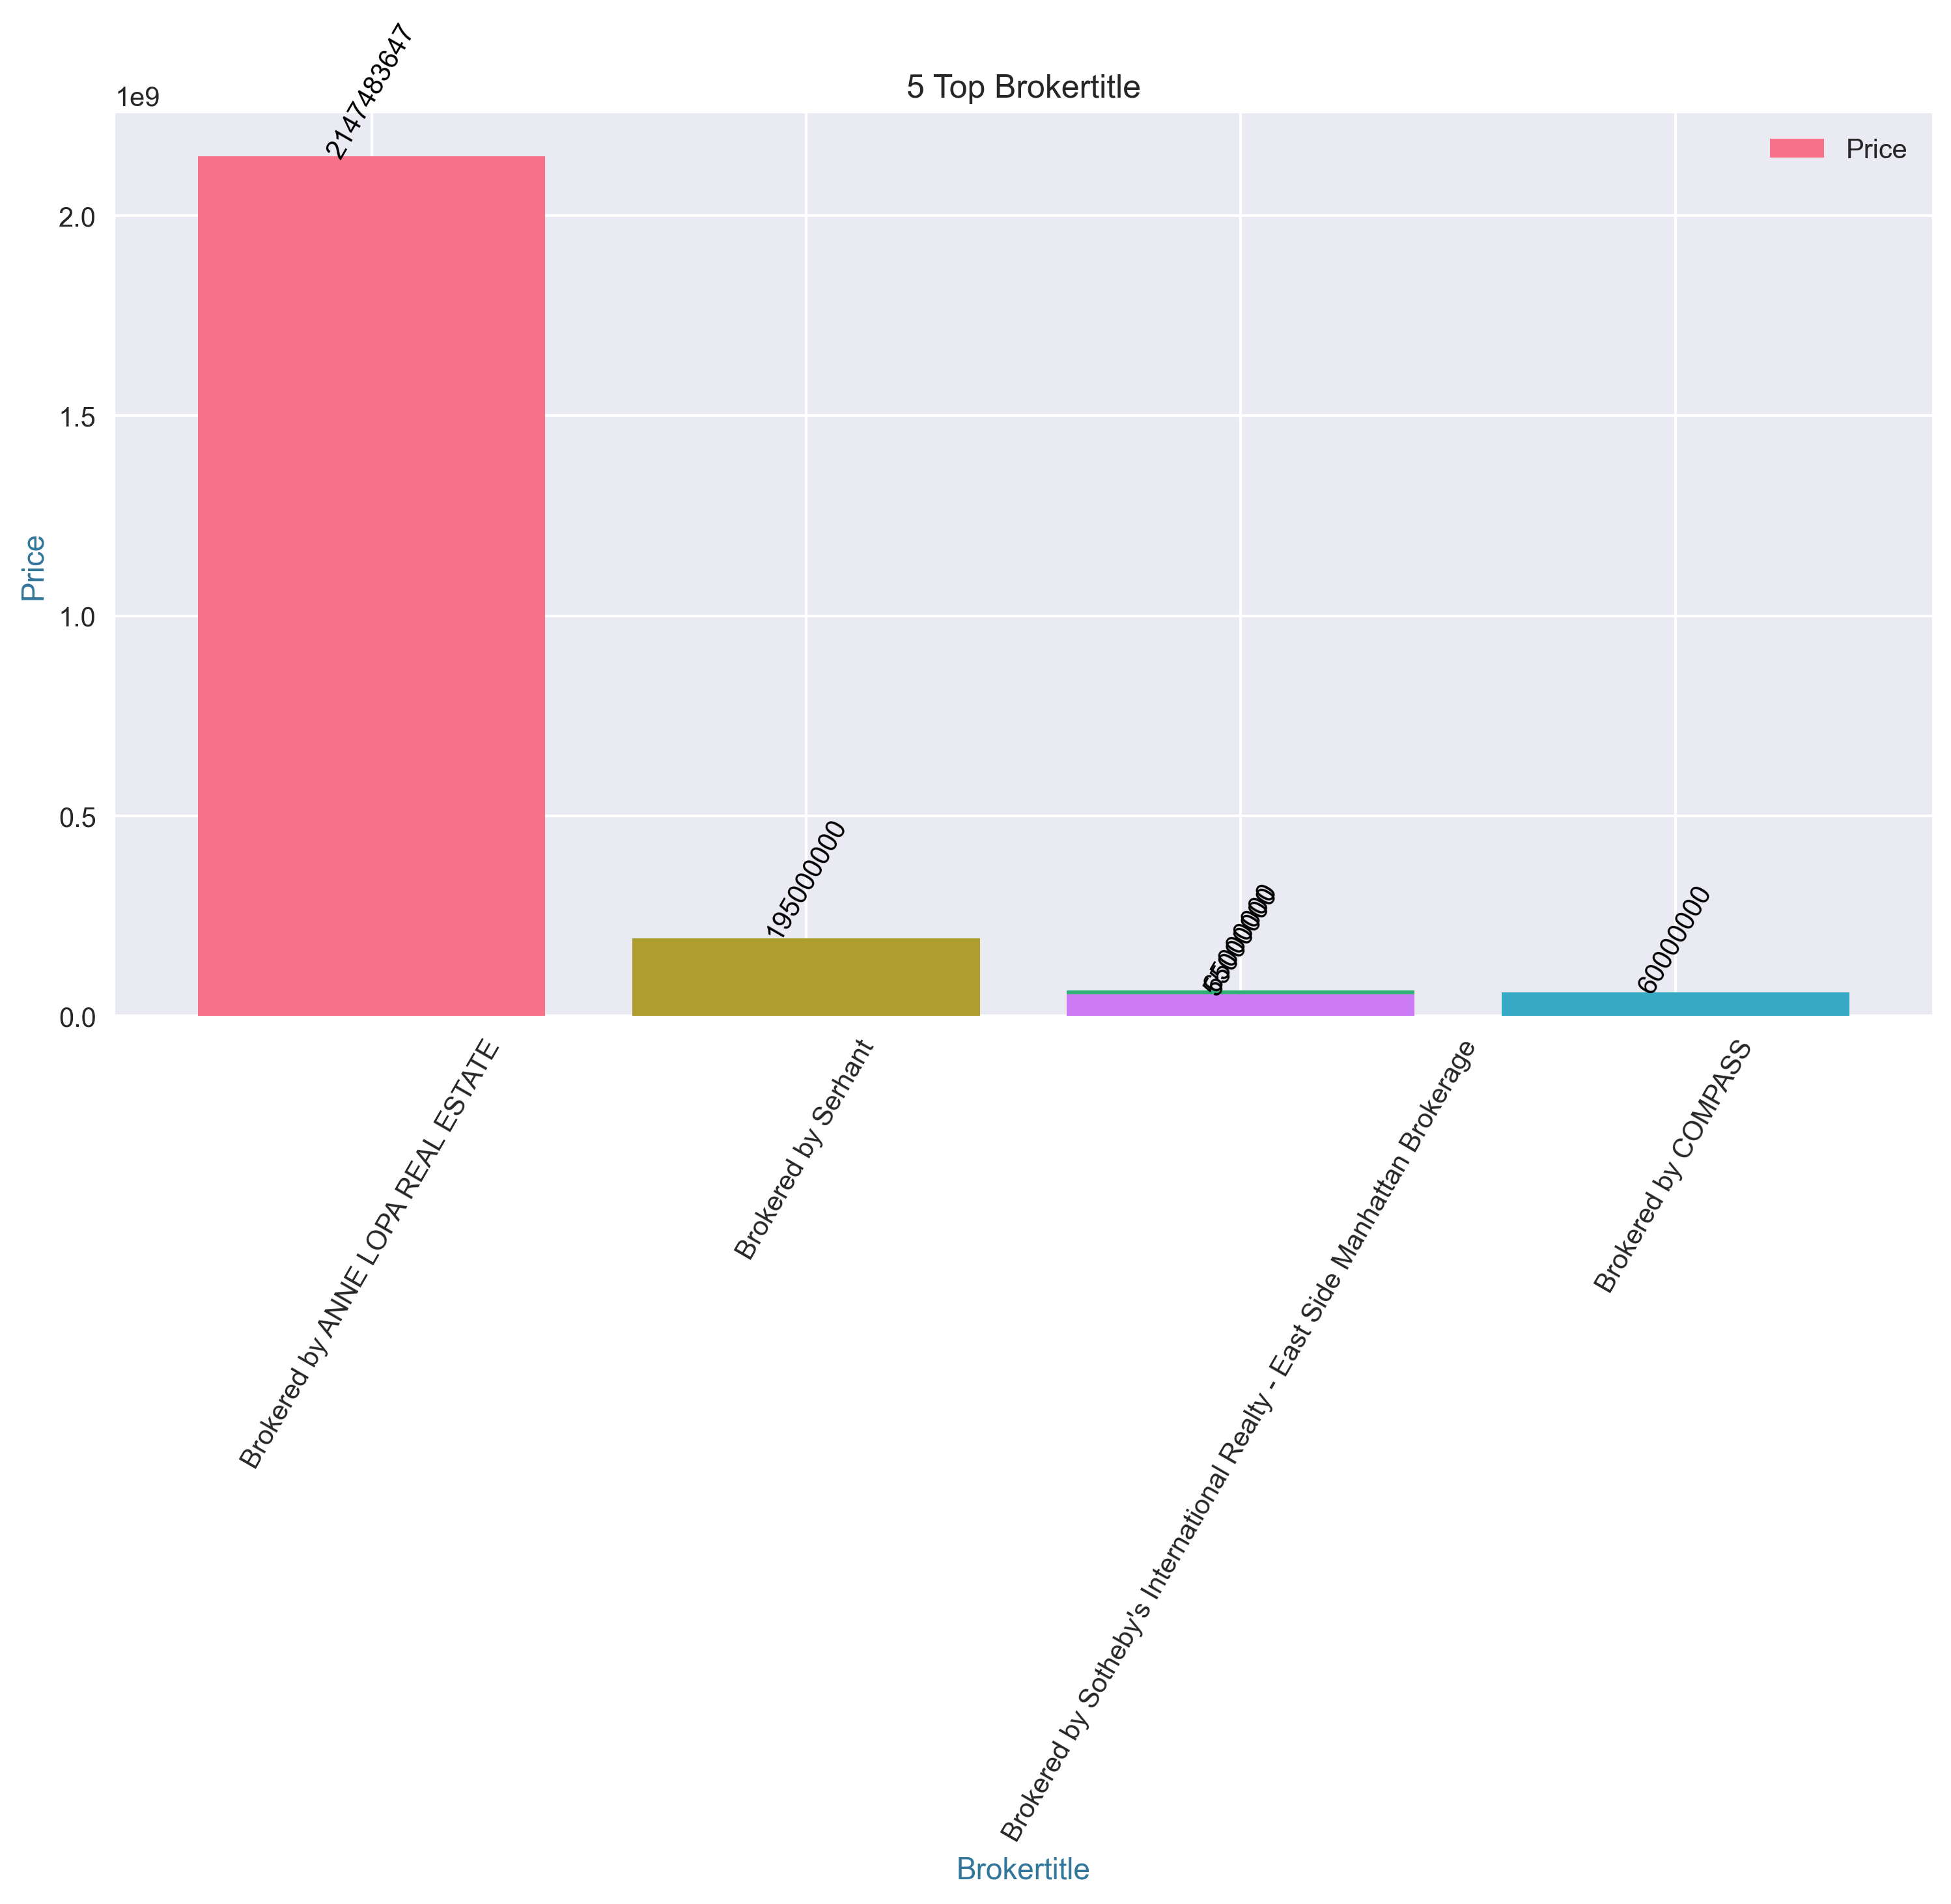

In [30]:
husl=sb.color_palette("husl", 5)

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12,6),dpi=300)
plt.bar(Top5_BROKERTITLE['BROKERTITLE'],Top5_BROKERTITLE['PRICE'],color=husl ,label='Price')
plt.title('5 Top Brokertitle')
plt.xlabel('Brokertitle',color='#32769B')
plt.ylabel('Price',color='#32769B')
plt.xticks(rotation=60)
for i,j in zip(Top5_BROKERTITLE.BROKERTITLE,Top5_BROKERTITLE.PRICE):
    plt.annotate(str(j),xy=(i,j),fontsize=10,color='#000000',ha='center',rotation=60 )
plt.legend() 
plt.show()

In [31]:
#Conclusions :
# BROKER Brokered by Anne Lopa Real Estate has the highest assets value in the dataset

In [32]:
Top5_SUBLOCALITY= NY_Housing_market[['SUBLOCALITY']].value_counts(ascending=False).head(5)

In [33]:
MEAN_SQFT_PRICE_BY_ROOMS=NY_Housing_market.groupby('ROOMS')['PRICE_FOR_SQFT'].mean().sort_values(ascending=False)
MEAN_SQFT_PRICE_BY_SUBLOCALITY=NY_Housing_market.groupby('SUBLOCALITY')['PRICE_FOR_SQFT'].mean().sort_values(ascending=False)
MEAN_SQFT_PRICE_BY_TYPE=NY_Housing_market.groupby('TYPE')['PRICE_FOR_SQFT'].mean().sort_values(ascending=False)

In [34]:
MEAN_SQFT_PRICE_BY_ROOMS_Top10=MEAN_SQFT_PRICE_BY_ROOMS.head(10)
MEAN_SQFT_PRICE_BY_TYPE_Top10=MEAN_SQFT_PRICE_BY_TYPE.head(10)
MEAN_SQFT_PRICE_BY_SUBLOCALITY_Top10=MEAN_SQFT_PRICE_BY_SUBLOCALITY.head(10)

In [35]:
pastel=sb.color_palette("pastel")

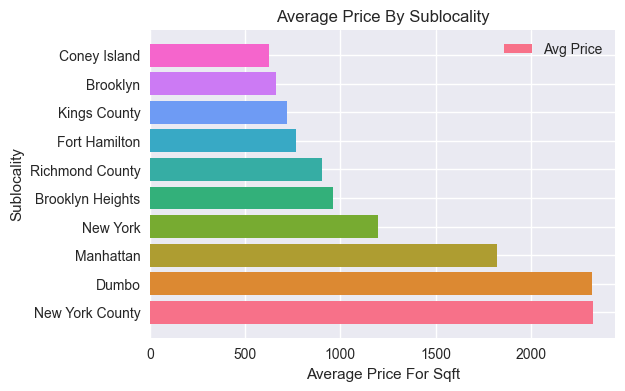

In [36]:
husl=sb.color_palette("husl", 10)

plt.figure(figsize=(6,4))
plt.style.use('seaborn-v0_8')
plt.barh(MEAN_SQFT_PRICE_BY_SUBLOCALITY_Top10.index,MEAN_SQFT_PRICE_BY_SUBLOCALITY_Top10,color=husl,label="Avg Price")
plt.title("Average Price By Sublocality")
plt.ylabel("Sublocality") 
plt.xlabel("Average Price For Sqft")
plt.legend() 
plt.show() 

In [37]:
#Conclusions :
# New York Country and Dumbo are the most expensive sublocalities in New York with an average price of 2 thousand dollars per square foot.

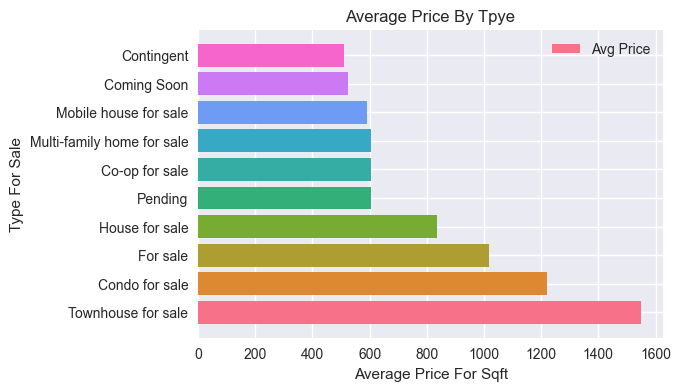

In [38]:
husl=sb.color_palette("husl", 10)

plt.figure(figsize=(6,4))
plt.style.use('seaborn-v0_8')
plt.barh(MEAN_SQFT_PRICE_BY_TYPE_Top10.index,MEAN_SQFT_PRICE_BY_TYPE_Top10,color=husl,label="Avg Price")
plt.title("Average Price By Tpye")
plt.ylabel("Type For Sale") 
plt.xlabel("Average Price For Sqft")
plt.legend() 
plt.show() 

In [ ]:
# TOWNHOUSE is the most expensive type of house in New York with an average price of 1.5 thousand dollars per square foot.

In [48]:
# Correlation Heatmap

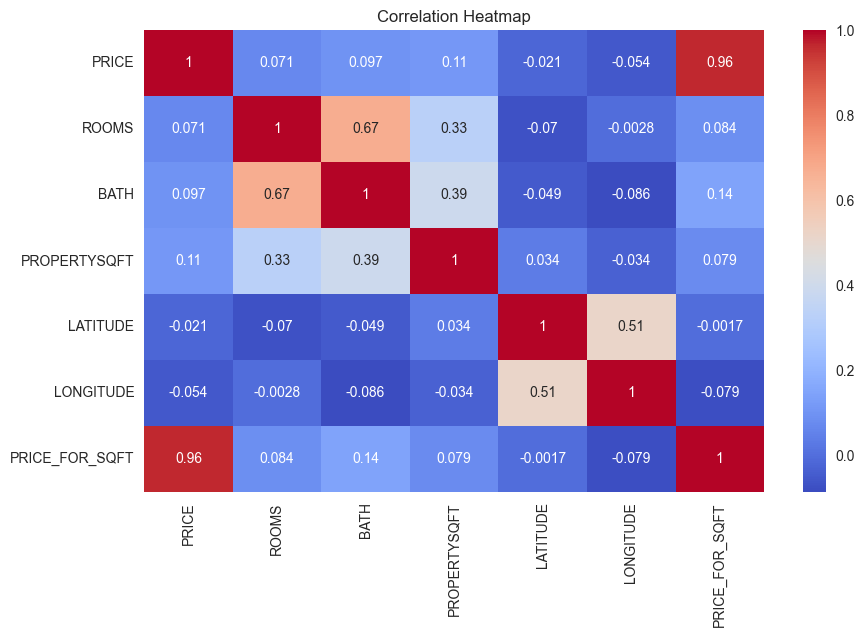

In [45]:
numeric_NY_Housing_market = NY_Housing_market.select_dtypes(include=[float, int])
correlation_matrix = numeric_NY_Housing_market.corr()

plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()